# Intro to NLP for AI | 02 - Text Preprocessing

## Lowercase

It is highly recommended to convert all texts to be in lowercase, as the further processes applied on these such texts are generally case-sensitive.

In [1]:
import pandas as pd
import numpy as np
import gensim

In [2]:
sentence = "Her cat's name is Luna"

In [3]:
lower_sentence = sentence.lower()

In [4]:
print(lower_sentence)

her cat's name is luna


In [5]:
sentence_list = ["Could you pass me the TV remote?", "It is IMPOSSIBLE to find this hotel", "Want to go on dinner on Tuesday?"]

In [6]:
lower_sentence_list = [x.lower() for x in sentence_list]
print(lower_sentence_list)

['could you pass me the tv remote?', 'it is impossible to find this hotel', 'want to go on dinner on tuesday?']


## Stopwords

Stopwords are the words that provide no or very little semantic values to text analysis. While they seem insignificant, removing tham can dramatically impact the performance and accuracy of NLP applications.

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yigit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
en_stopwords = stopwords.words('english')

In [9]:
print(en_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [10]:
sentence = "it was too far to go to the shop and he did not want her to walk"

In [11]:
sentence_no_stopwords = ' '.join([word for word in sentence.split() if word not in en_stopwords])

In [12]:
sentence_no_stopwords

'far go shop want walk'

In [13]:
en_stopwords.remove("did")
en_stopwords.remove("not")
en_stopwords.append("go")

In [14]:
sentence_no_stopwords_custom = ' '.join([word for word in sentence.split() if word not in en_stopwords])

In [15]:
sentence_no_stopwords_custom

'far shop did not want walk'

## Regular Expressions

Regular Expression (RegEx) is a sequence of characters that forms a search pattern. This can be used to check if a string contains the specified search pattern.

In [16]:
import re

In [49]:
my_folder = "C:\desktop\notes"
print(my_folder)

C:\desktop
otes


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\yigit\AppData\Local\Temp\ipykernel_25668\4072164317.py:1: SyntaxWarning: invalid escape sequence '\d'
  my_folder = "C:\desktop\notes"


In [18]:
my_folder = r"C:\desktop\notes"
print(my_folder)

C:\desktop\notes


`re.search`: Returns a `Match` object if there is a match anywhere in the string, otherwise returns `None`

In [51]:
result_search = re.search("pattern", r"string to contain the pattern")
print(result_search)

<re.Match object; span=(22, 29), match='pattern'>


In [20]:
result_search_2 = re.search("pattern", r"the phrase to find isn't in this string")
print(result_search_2)

None


`re.sub`: Replaces one or many matches with a string

In [21]:
string1 = "sara was able to help me find the items I needed quickly"
new_string1 = re.sub("sara", "sarah", string1)
print(new_string1)

sarah was able to help me find the items I needed quickly


In [22]:
customer_reviews = ['sam was a great help to me in the store', 
 'the cashier was very rude to me, I think her name was eleanor', 
 'amazing work from sadeen!', 
 'sarah was able to help me find the items i needed quickly', 
 'lucy is such a great addition to the team', 
 'great service from sara she found me what i wanted']

In [23]:
sarahs_reviews = []
pattern = r"sarah?"
for string in customer_reviews:
    if re.search(pattern, string):
        sarahs_reviews.append(string)
print(sarahs_reviews)

['sarah was able to help me find the items i needed quickly', 'great service from sara she found me what i wanted']


In [24]:
a_reviews = []
pattern = r"^a"
for string in customer_reviews:
    if re.search(pattern, string):
        a_reviews.append(string)
print(a_reviews)

['amazing work from sadeen!']


In [25]:
y_reviews = []
pattern = r"y$"
for string in customer_reviews:
    if re.search(pattern, string):
        y_reviews.append(string)
print(y_reviews)

['sarah was able to help me find the items i needed quickly']


In [26]:
needwant_reviews = []
pattern = r"(need|want)ed"
for string in customer_reviews:
    if re.search(pattern, string):
        needwant_reviews.append(string)
print(needwant_reviews)

['sarah was able to help me find the items i needed quickly', 'great service from sara she found me what i wanted']


In [27]:
no_punct_reviews = []
pattern = r"[^\w\s]"
for string in customer_reviews:
    no_punct_string = re.sub(pattern, "", string)
    no_punct_reviews.append(no_punct_string)
print(no_punct_reviews)

['sam was a great help to me in the store', 'the cashier was very rude to me I think her name was eleanor', 'amazing work from sadeen', 'sarah was able to help me find the items i needed quickly', 'lucy is such a great addition to the team', 'great service from sara she found me what i wanted']


`re.findall`: Returns a list containing all matches

In [73]:
review = "the cashier was not very helpful for me, i think her name was eleanor"
found_strings1 = re.findall("a", review)
print(found_strings1)
found_strings2 = re.findall("me", review)
print(found_strings2)
found_strings3 = re.findall("el", review)
print(found_strings3)
found_strings4 = re.findall("\\w{3}", review)
print(found_strings4)

['a', 'a', 'a', 'a', 'a']
['me', 'me']
['el', 'el']
['the', 'cas', 'hie', 'was', 'not', 'ver', 'hel', 'pfu', 'for', 'thi', 'her', 'nam', 'was', 'ele', 'ano']


`re.split`: Returns a list where the string has been split at each match

In [82]:
review = "sarah was able to help me find the items i needed quickly"
split_string1 = re.split("\\s", review)
print(split_string1)
split_string2 = re.split("i", review)
print(split_string2)
split_string3 = re.split("e", review)
print(split_string3)

['sarah', 'was', 'able', 'to', 'help', 'me', 'find', 'the', 'items', 'i', 'needed', 'quickly']
['sarah was able to help me f', 'nd the ', 'tems ', ' needed qu', 'ckly']
['sarah was abl', ' to h', 'lp m', ' find th', ' it', 'ms i n', '', 'd', 'd quickly']


## Remember These For Regular Expressions

### Metacharacters

* `[]`: A set of characters (`[a-n]`)
* `\`: Signals a special sequence (can also be used to escape characters) (`\d`)
* `.`: Any character (except newline character) (`he..o`)
* `^`: Starts with (`^hello`)
* `$`: Ends with (`world$`)
* `*`: Zero or more occurrences (`he.*o`)
* `+`: One or more occurrences (`he.?o`)
* `?`: Zero or one occurrences (`he.?o`)
* `{}`: Exactly the specified number of occurrences (`he.{2}o`)
* `|`: Either or (`falls|stays`)
* `()`: Capture and group

### Flags

* `re.ASCII` / `re.A`: Returns only ASCII characters
* `re.DEBUG`: Returns debug information
* `re.DOTALL` / `re.S`: Makes the . character match all characters (including newline character)
* `re.IGNORECASE` / `re.I`: Case-insensitive matching
* `re.MULTILINE` / `re.M`: Returns only matches at the beginning of each line
* `re.NOFLAG`: Specifies that no flag is set for this pattern
* `re.UNICODE` / `re.U`: Returns Unicode matches. This is default from Python 3. For Python 2; use this flag to return only Unicode matches
* `re.VERBOSE` / `re.X`: Allows whitespaces and comments inside patterns. Makes the pattern more readable

### Special Sequences

* `\A`: Returns a match if the specified characters are at the beginning of the string (`\AThe`)
* `\b`: Returns a match where the specified characters are at the beginninng or at the end of a word (`r"\bain"`, `r"ain\b"`)
* `\B`: Returns a match where the specified characters are present, but NOT at the beginning or at the end of a word (`r"\Bain"`, `r"ain\B"`)
* `\d`: Returns a match where the string contains digits (numbers from 0-9)
* `\D`: Returns a match where the string DOES NOT contain digits
* `\s`: Returns a match where the string contains a white space character
* `\S`: Returns a match where the string DOES NOT contain a white space character
* `\w`: Returns a match where the string contains any word characters (a-Z, 0-9, _)
* `\W`: Returns a match where the string DOES NOT contain any word characters
* `\Z`: Returns a match if the specified characters are at the end of the string (`Spain\Z`)

### Sets

* `[arn]`: Returns a match where one of the specified characters (a, r, or n) is present
* `[a-n]`: Returns a match for any lower case character, alphabetically between a and n
* `[^arn]`: Returns a match for any character EXCEPT a, r or n
* `[0123]`: Returns a match where any of the specified digits (0, 1, 2, or 3) are present
* `[0-9]`: Returns a match for any digit between 0 and 9
* `[0-5][0-9]`: Returns a match for any two-digit numbers from 00 and 59
* `[a-zA-Z]`: Returns a match for any character alphabetically between a and z, lowercase OR uppercase
* `[+]`: In sets, +, *, ., |, (), $, {} has no special meaning, so `[+]`means: return a match for any + character in the string

## Tokenization

While working with text data, it is often required to break it into smaller units (tokens), which can be words, sentences or even characters. It is usually the first step in many NLP tasks, such as text classification, sentiment analysis or building language models.

In [28]:
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yigit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [52]:
# Sentence tokenization
sentence1 = "Her cat's name is Luna. Her dog's name is Max."
sent_tokenize(sentence1)

["Her cat's name is Luna.", "Her dog's name is Max."]

In [53]:
# Word tokenization
sentence2 = "Her dog's name is Max."
word_tokenize(sentence2)

['Her', 'dog', "'s", 'name', 'is', 'Max', '.']

In [54]:
sentence3 = "Her cat's name is Luna and her dog's name is Max."
word_tokenize(sentence3)

['Her',
 'cat',
 "'s",
 'name',
 'is',
 'Luna',
 'and',
 'her',
 'dog',
 "'s",
 'name',
 'is',
 'Max',
 '.']

## Stemming

Porter Stemmer simplifies words by reducing them to their root forms. It works by applying a series of rules to remove suffixes from words. It identifies and strips common endings, reducing words to their base forms (stems). However, these produced stems may not be meaningful and it is primarily designed for English.

In [32]:
from nltk.stem import PorterStemmer

In [33]:
ps = PorterStemmer()

In [34]:
connect_tokens = ['connecting', 'connected', 'connectivity', 'connect', 'connects', 'connector']
for t in connect_tokens:
    print(t, ":", ps.stem(t))

connecting : connect
connected : connect
connectivity : connect
connect : connect
connects : connect
connector : connector


In [35]:
learn_tokens = ['learned', 'learning', 'learn', 'learns', 'learner', 'learners', 'learnt']
for t in learn_tokens:
    print(t, ":", ps.stem(t))

learned : learn
learning : learn
learn : learn
learns : learn
learner : learner
learners : learner
learnt : learnt


In [36]:
likes_tokens = ['likes', 'better', 'best', 'worse', 'worst']
for t in likes_tokens:
    print(t, ":", ps.stem(t))

likes : like
better : better
best : best
worse : wors
worst : worst


## Lemmatization

Another text preprocessing technique in NLP. Unlike stemming, leammatization considers the word's meaning and part of speech (POS) and ensures that the base form is a valid word. This makes lemmatization more accurate as it avoids generating non-dictionary words. It also helps reduce redundancy in the dataset.

In [37]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yigit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
lemmatizer = WordNetLemmatizer()

In [39]:
for t in connect_tokens:
    print(t, ":", lemmatizer.lemmatize(t))

connecting : connecting
connected : connected
connectivity : connectivity
connect : connect
connects : connects
connector : connector


In [40]:
for t in learn_tokens:
    print(t, ":", lemmatizer.lemmatize(t))

learned : learned
learning : learning
learn : learn
learns : learns
learner : learner
learners : learner
learnt : learnt


In [41]:
for t in likes_tokens:
    print(t, ":", lemmatizer.lemmatize(t))

likes : like
better : better
best : best
worse : worse
worst : worst


## N-grams

N-gram is a language modeling technique that is defined as the contiguous sequence of n items from a given sample of text or speech. The N-grams are collected from a text or speech corpus. Most frequent ones are unigrams, bigrams and trigrams.

In [42]:
import matplotlib.pyplot as plt

In [43]:
tokens = ['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']
print(tokens)

['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']


In [44]:
unigrams = pd.Series(nltk.ngrams(tokens, 1)).value_counts()
print(unigrams)

(to,)       7
(of,)       6
(the,)      4
(in,)       4
(and,)      3
           ..
(only,)     1
(set,)      1
(grow,)     1
(years,)    1
(come,)     1
Name: count, Length: 79, dtype: int64


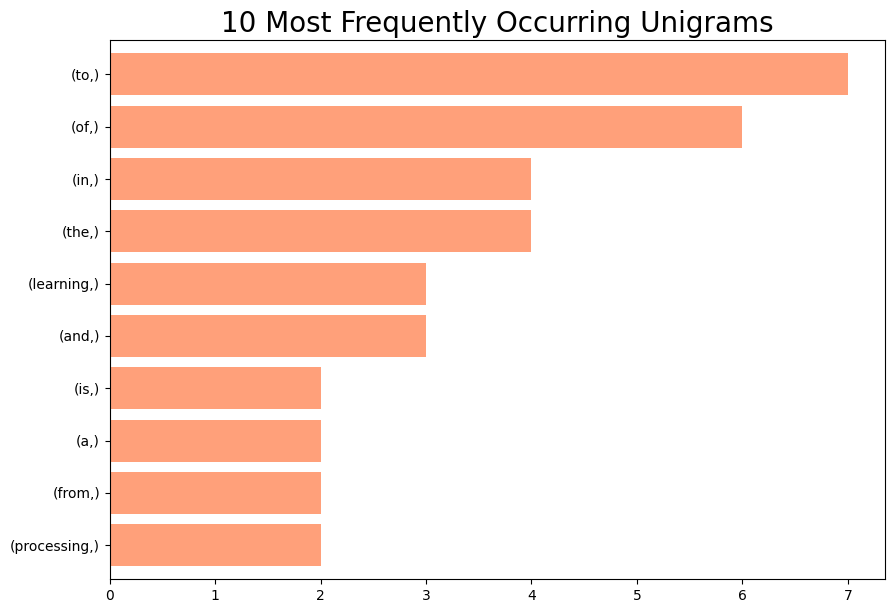

In [45]:
unigrams[:10].sort_values().plot.barh(color='lightsalmon', width=0.8, figsize=(10,7))
plt.title("10 Most Frequently Occurring Unigrams", fontsize=20)
plt.show()

In [46]:
bigrams = pd.Series(nltk.ngrams(tokens, 2)).value_counts()
print(bigrams)

(that, were)                  2
(rise, of)                    1
(of, artificial)              1
(artificial, intelligence)    1
(intelligence, has)           1
                             ..
(grow, in)                    1
(in, the)                     1
(the, years)                  1
(years, to)                   1
(to, come)                    1
Name: count, Length: 105, dtype: int64


In [47]:
trigrams = pd.Series(nltk.ngrams(tokens, 3)).value_counts()
print(trigrams)

(the, rise, of)                    1
(rise, of, artificial)             1
(of, artificial, intelligence)     1
(artificial, intelligence, has)    1
(intelligence, has, led)           1
                                  ..
(to, grow, in)                     1
(grow, in, the)                    1
(in, the, years)                   1
(the, years, to)                   1
(years, to, come)                  1
Name: count, Length: 105, dtype: int64
